# Projeto Airbnb Porto -  Previsão de Preço de Imóvel 

## Base de dados

Os dados foram obtidos no Inside Airbnb (http://insideairbnb.com). Este site fornece dados do Airbnb contendo conjuntos de dados extraídos de várias cidades ao redor do mundo onde O Airbnb está disponível. 
Coletamos o conjunto de dados (chamado listagens) com 75 variáveis 44569 observações das propriedades disponíveis no Plataforma Airbnb na cidade do Porto nos meses 12/2021, 03/2022, 06/2022 e 09/2022.

## Importação das bibliotecas

In [1]:
import pandas as pd
import pathlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split

## Importação dos arquivos

In [20]:
caminho_bases = pathlib.Path('dataset')

base_airbnb = pd.DataFrame()

for arquivo in caminho_bases.iterdir():
    df = pd.read_csv(caminho_bases / arquivo.name)
    base_airbnb = base_airbnb.append(df)
    
display(base_airbnb.head())

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,source
0,41339,https://www.airbnb.com/rooms/41339,20211208225259,2021-12-09,Porto city flat near the sea,Here you'll find all you need for your holiday...,In the surrounds you have Serralves Museum and...,https://a0.muscache.com/pictures/25727334/9578...,180050,https://www.airbnb.com/users/show/180050,...,4.47,4.59,29049/AL,t,1,1,0,0,0.16,NaN
1,55111,https://www.airbnb.com/rooms/55111,20211208225259,2021-12-09,Fontielas Houses |Floor1 in House with shared ...,First Floor in House with shared Swimingpool a...,NaN,https://a0.muscache.com/pictures/b3c38006-5fdf...,259711,https://www.airbnb.com/users/show/259711,...,4.77,4.77,7563/AL,f,3,3,0,0,0.18,NaN
2,73828,https://www.airbnb.com/rooms/73828,20211208225259,2021-12-09,Fontielas Houses |Floor0 in House with shared ...,Piso no rés-do-chão em moradia com piscina par...,NaN,https://a0.muscache.com/pictures/ffb19299-425c...,259711,https://www.airbnb.com/users/show/259711,...,4.88,4.63,7563/AL,f,3,3,0,0,0.10,NaN
3,86388,https://www.airbnb.com/rooms/86388,20211208225259,2021-12-09,A Formosa - a nest made for two,<b>The space</b><br />A big and bright bedroo...,NaN,https://a0.muscache.com/pictures/850099/b80470...,185209,https://www.airbnb.com/users/show/185209,...,4.84,4.77,6995/AL,f,7,1,6,0,1.14,NaN
4,87873,https://www.airbnb.com/rooms/87873,20211208225259,2021-12-09,Oporto Apartment Triplex,- Cozy apartment with great sun exposition<br ...,OPorto Apartment Triplex is located on Rua San...,https://a0.muscache.com/pictures/33686513/c54f...,480980,https://www.airbnb.com/users/show/480980,...,4.52,4.86,634/AL,f,3,1,2,0,1.65,NaN


In [166]:
print(base_airbnb.shape)

(44569, 75)


In [119]:
print(list(base_airbnb.columns))

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 

## Escolha das colunas 

O grande número de colunas dificulta a análise e uma breve análise qualitativa indica que podemos reduzir significativamente este número o que tornará mais simples a manipulação da base de dados.
Vamos eliminar as colunas do tipo:
1. Nomes e Links;
2. Colunas duplicadas;
3. Colunas preenchidas com texto livre; e
4. Colunas em que todos ou quase todos os valores são iguais.

Para realização da análise qualitativa vamos exportar primeiras 1000 linhas do arquivo e então decidir quais colunas podem ser eliminadas.

In [3]:
base_airbnb.head(1000).to_csv('primeiros_registros.csv', sep=';')


Após análise qualitativa das colunas, levando em conta os critérios explicados acima, ficamos as seguintes colunas:


In [21]:
colunas = ['id','last_scraped','host_response_time','host_response_rate','host_acceptance_rate','host_is_superhost','latitude','longitude','property_type','accommodates','bedrooms','beds','amenities','price','minimum_nights','maximum_nights','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','reviews_per_month']
base_airbnb = base_airbnb.loc[:, colunas]
print('Colunas restantes: {}'.format(base_airbnb.shape[1]))

Colunas restantes: 25


## Análise dos valores faltantes

Dentre as colunas selecionadas, observa-se volume significativo de informações nulas de forma que optamos por excluir as colunas em que mais de 10% das linhas possuem valores nulos

In [22]:
print(base_airbnb.isnull().sum())
print('Número de colunas: {}'.format(base_airbnb.shape[1]))
print('-'*60)
for coluna in base_airbnb:
    if base_airbnb[coluna].isnull().sum() > (0.1*base_airbnb.shape[0]):
        base_airbnb = base_airbnb.drop(coluna, axis=1)
print(base_airbnb.isnull().sum())
print('Colunas restantes: {}'.format(base_airbnb.shape[1]))

id                                0
last_scraped                      0
host_response_time             9202
host_response_rate             9202
host_acceptance_rate           7824
host_is_superhost                 6
latitude                          0
longitude                         0
property_type                     0
accommodates                      0
bedrooms                       4476
beds                            585
amenities                         0
price                             0
minimum_nights                    0
maximum_nights                    0
number_of_reviews                 0
review_scores_rating           5868
review_scores_accuracy         6059
review_scores_cleanliness      6052
review_scores_checkin          6065
review_scores_communication    6059
review_scores_location         6065
review_scores_value            6068
reviews_per_month              5868
dtype: int64
Número de colunas: 25
------------------------------------------------------------
id  

Agora vamos excluir as linhas nulas que sobraram:

In [23]:
base_airbnb = base_airbnb.dropna()
print('Por fim, ficamos com {} colunas e {} linhas'.format(base_airbnb.shape[1], base_airbnb.shape[0]))

Por fim, ficamos com 13 colunas e 43978 linhas


## Tratamento dos dados

In [44]:
base_airbnb_trat = base_airbnb.copy()
print(base_airbnb_trat.dtypes)
print('-'*60)
print(base_airbnb_trat.iloc[0])

id                     int64
last_scraped          object
host_is_superhost     object
latitude             float64
longitude            float64
property_type         object
accommodates           int64
beds                 float64
amenities             object
price                 object
minimum_nights         int64
maximum_nights         int64
number_of_reviews      int64
dtype: object
------------------------------------------------------------
id                                                               41339
last_scraped                                                2021-12-09
host_is_superhost                                                    f
latitude                                                       41.1501
longitude                                                     -8.66035
property_type                                       Entire rental unit
accommodates                                                         5
beds                                               

### - price

A varíavel preço é nossa variável resposta e é contínua, por isso, temos que remover o $ e transforma-la para o tipo float.


In [45]:
base_airbnb_trat['price'] = base_airbnb_trat['price'].str.replace('$', '')
base_airbnb_trat['price'] = base_airbnb_trat['price'].str.replace(',', '')
base_airbnb_trat['price'] = base_airbnb_trat['price'].astype(np.float32, copy=False)
print(base_airbnb_trat.dtypes)
print('-'*60)
print(base_airbnb_trat.iloc[0])

id                     int64
last_scraped          object
host_is_superhost     object
latitude             float64
longitude            float64
property_type         object
accommodates           int64
beds                 float64
amenities             object
price                float32
minimum_nights         int64
maximum_nights         int64
number_of_reviews      int64
dtype: object
------------------------------------------------------------
id                                                               41339
last_scraped                                                2021-12-09
host_is_superhost                                                    f
latitude                                                       41.1501
longitude                                                     -8.66035
property_type                                       Entire rental unit
accommodates                                                         5
beds                                               

C:\Users\user\AppData\Local\Temp/ipykernel_2340/2260460192.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  base_airbnb_trat['price'] = base_airbnb_trat['price'].str.replace('$', '')


### - last_scraped

Esta variável indica o mês em que o dado foi coletado no site do Airbnb. Também vamos criar uma variável com a informação do mês e ano.

In [46]:
base_airbnb_trat['last_scraped'] = pd.to_datetime(base_airbnb_trat['last_scraped'], errors='coerce', format='%Y-%m-%d')
base_airbnb_trat['mes_ano'] = base_airbnb_trat['last_scraped'].dt.strftime('%m/%Y')
print(base_airbnb_trat.dtypes)
print('-'*60)
print(base_airbnb_trat.iloc[0])

id                            int64
last_scraped         datetime64[ns]
host_is_superhost            object
latitude                    float64
longitude                   float64
property_type                object
accommodates                  int64
beds                        float64
amenities                    object
price                       float32
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64
mes_ano                      object
dtype: object
------------------------------------------------------------
id                                                               41339
last_scraped                                       2021-12-09 00:00:00
host_is_superhost                                                    f
latitude                                                       41.1501
longitude                                                     -8.66035
property_type                                       Entire rental 

### - host_is_superhost
Por ser uma variável boleana vamos substituir True ou False, vamos substituir True por 1 e False por 0 respectivamente.

In [47]:
print(base_airbnb_trat['host_is_superhost'].value_counts())
base_airbnb_trat.loc[base_airbnb_trat.host_is_superhost=='t', 'host_is_superhost']=1
base_airbnb_trat.loc[base_airbnb_trat.host_is_superhost=='f', 'host_is_superhost']=0
print(base_airbnb_trat['host_is_superhost'].value_counts())

f    30337
t    13641
Name: host_is_superhost, dtype: int64
0    30337
1    13641
Name: host_is_superhost, dtype: int64


### - property_type



In [48]:
print(base_airbnb_trat['host_is_superhost'].value_counts())

0    30337
1    13641
Name: host_is_superhost, dtype: int64


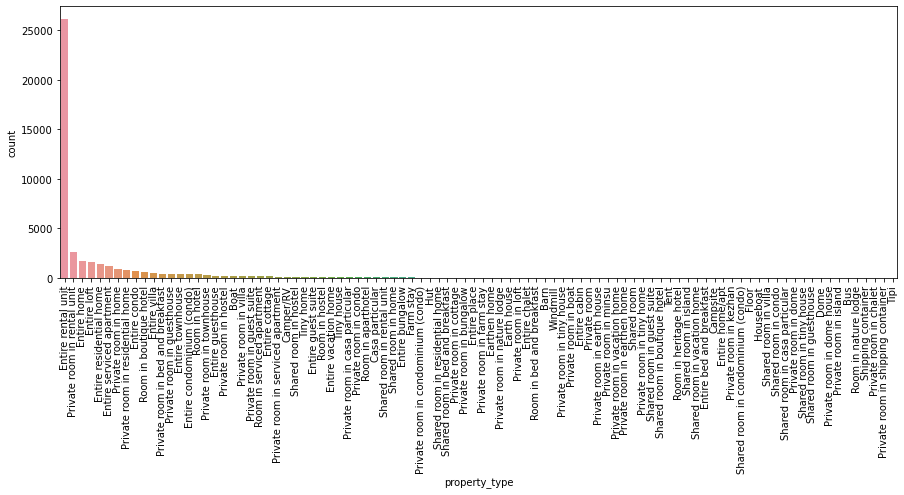

In [49]:
property_type=base_airbnb_trat['property_type'].value_counts()

plt.figure(figsize=(15, 5))
grafico = sns.countplot(x='property_type', data=base_airbnb_trat, order = base_airbnb_trat['property_type'].value_counts().index)
grafico.tick_params(axis='x', rotation=90)

Como temos muitas categorias vamos agrupar os tipos de propriedade com menos de 500 observações em uma categoria denominada "outros"

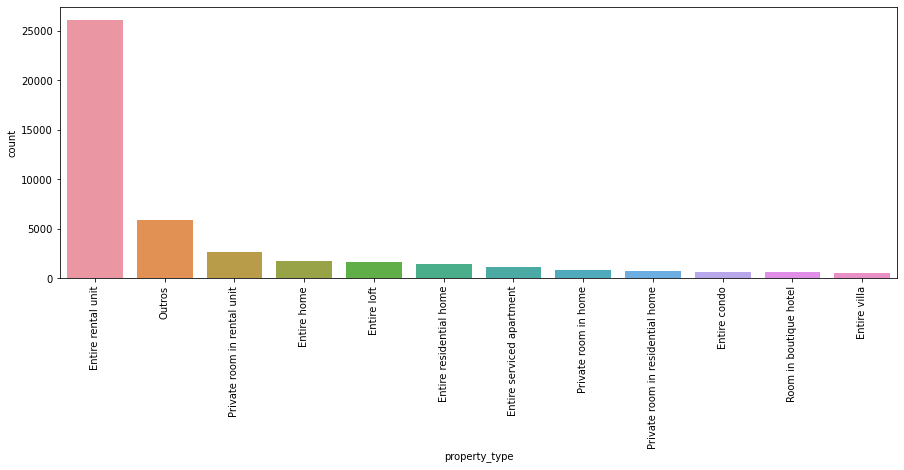

In [50]:
tabela_tipos_casa = base_airbnb_trat['property_type'].value_counts()
# print(tabela_tipos_casa)

colunas_agrupar = []

for tipo in tabela_tipos_casa.index:
    if tabela_tipos_casa[tipo] < 500:
        colunas_agrupar.append(tipo)
# print(colunas_agrupar)

for tipo in colunas_agrupar:
    base_airbnb_trat.loc[base_airbnb_trat['property_type']==tipo, 'property_type'] = 'Outros'
    
# print(base_airbnb_trat['property_type'].value_counts())
plt.figure(figsize=(15, 5))
grafico = sns.countplot(x='property_type', data=base_airbnb_trat, order = base_airbnb_trat['property_type'].value_counts().index)
grafico.tick_params(axis='x', rotation=90)

### - amenities

A coluna que descreve as comodidade possui descrições diversas separadas por vírgula e neste caso contaremos as comodidades.

In [57]:
print(base_airbnb_trat['amenities'].iloc[1].split(','))
print(len(base_airbnb_trat['amenities'].iloc[1].split(',')))
base_airbnb_trat['n_amenities'] = base_airbnb_trat['amenities'].str.split(',').apply(len)

['["Hangers"', ' "Oven"', ' "Iron"', ' "Microwave"', ' "Kitchen"', ' "Fire extinguisher"', ' "Bed linens"', ' "Bathtub"', ' "Wifi"', ' "Essentials"', ' "Dishes and silverware"', ' "Free parking on premises"', ' "First aid kit"', ' "Long term stays allowed"', ' "Extra pillows and blankets"', ' "Hair dryer"', ' "High chair"', ' "Refrigerator"', ' "Coffee maker"', ' "Baby bath"', ' "Patio or balcony"', ' "Stove"', ' "Pack \\u2019n play/Travel crib"', ' "Host greets you"', ' "Luggage dropoff allowed"', ' "Hot water"', ' "Free street parking"', ' "Washer"', ' "Cooking basics"', ' "BBQ grill"', ' "Pool"', ' "TV"', ' "Baby safety gates"', ' "Backyard"', ' "Crib"]']
35


## Análise exploratória dos dados

### Análise dos outliers

Na seção a seguir vamos analisar a distribuição das variáveis númericas e identificar outliers.

### Definição de funções

Vamos definir algumas funções para ajudar na análise de outliers das colunas.

In [126]:
# Função para cálculo dos limites mínimos e máximos a partir dos quais o valor observado é considerado outlier.

def limites(coluna):
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    amplitude = q3 - q1
    return q1 - 1.5 * amplitude, q3 + 1.5 * amplitude

# Função para exclusão dos outliers para ser utilizada no caso da decisão de exclusão destas observações.

def excluir_outliers(df, nome_coluna):
    qtde_linhas = df.shape[0]
    lim_inf, lim_sup = limites(df[nome_coluna])
    df = df.loc[(df[nome_coluna] >= lim_inf) & (df[nome_coluna] <= lim_sup), :]
    linhas_removidas = qtde_linhas - df.shape[0]
    return df,  linhas_removidas

# Função para contar outliers

def cont_outliers (df, coluna):
    lim_inf, lim_sup = limites(df[coluna])
    qtd_outliers=df.loc[(df[coluna] < lim_inf) | (df[coluna] > lim_sup), :].shape[0]
    return df, qtd_outliers

# Função para construção do Boxplot com e sem outliers

def diagrama_caixa(coluna):
    fig, (ax1, ax2)=plt.subplots(1,2)
    fig.set_size_inches(17,5)
    sns.boxplot(x=coluna, ax=ax1).set_title('BoxPlot')
    sns.boxplot(x=coluna, ax=ax2, showfliers=False).set_title('BoxPlot - Sem Outliers')

# Função para construção do Histograma
    
def histograma(coluna):
    plt.figure(figsize=(16, 5))
    sns.histplot(coluna).set_title('Histograma')   

### - price

Mais de 92% das observações possuem o preço inferior a 183.0.

Há propriedades cuja locação de dá por valor significavamente superior, chegando até 11,799.0. 

Nosso objetivo não passar por tentar modelar propriedades de luxo e com perfil tão peculiar e por isso vamos ignorar os outliers de preço.

(-33.0, 183.0)
O preço máximo observado é 11799.0
A quantidade de outliers é 3391, ou seja 7.71% dos dados


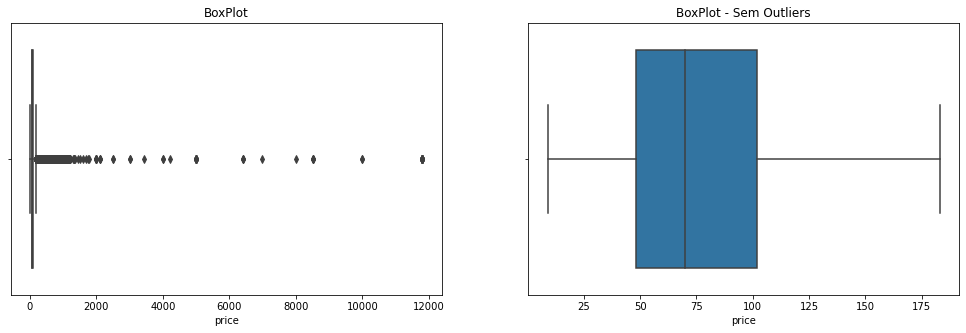

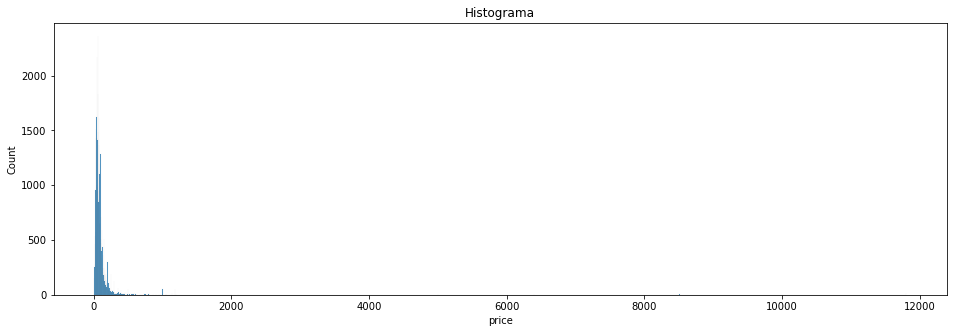

In [130]:
print(limites(base_airbnb_trat['price']))

diagrama_caixa(base_airbnb_trat['price'])

histograma(base_airbnb_trat['price'])

base_airbnb, qtd_outliers = cont_outliers(base_airbnb_trat,'price')

qtd_outliers=base_airbnb_trat.loc[(base_airbnb_trat['price'] < lim_inf) | (base_airbnb_trat['price'] > lim_sup), :].shape[0]

prop_outliers=qtd_outliers/base_airbnb_trat.shape[0]

max_price=base_airbnb_trat['price'].max()

print('O preço máximo observado é {}'.format(max_price))

print('A quantidade de outliers é {}, ou seja {:.2%} dos dados'.format(qtd_outliers, prop_outliers))


Excluindo as observações cujos valores da variável 'price' são outliers.

In [133]:
base_airbnb_trat, linhas_removidas = excluir_outliers(base_airbnb_trat, 'price')
print('{} linhas removidas'.format(linhas_removidas))

3391 linhas removidas


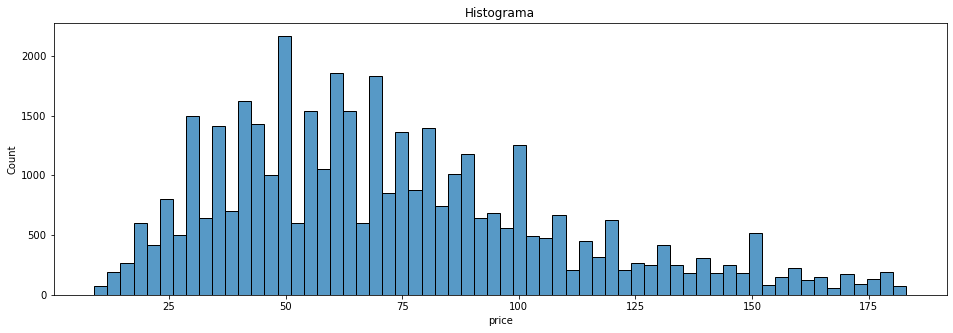

In [134]:
histograma(base_airbnb_trat['price'])

In [ ]:
Com a remoção dos outliers, temos ainda uma calda pesada à direita, mas muito mais suave que a antes.

### - n_amenities

Como podemos observar a seguir, pouco mais de 1% das observações contém outliers e a remoção dos outliers torna a distribuição dos dados pouco mais simétrica e por esta razão optamos pela exclusão das 447 observações.

(-5.0, 59.0)
A quantidade de outliers é 447, ou seja 1.02% dos dados


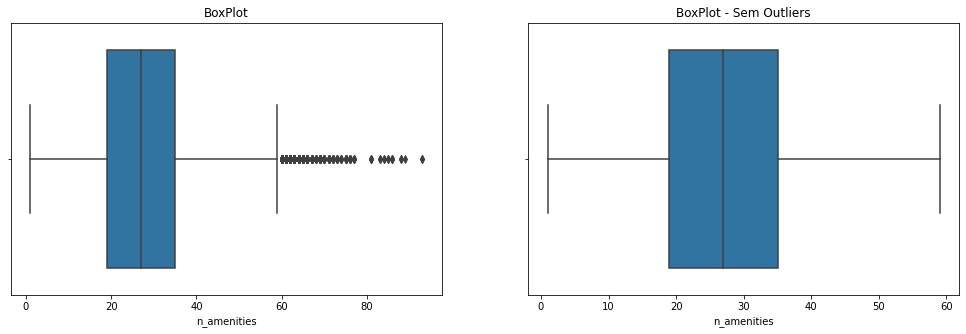

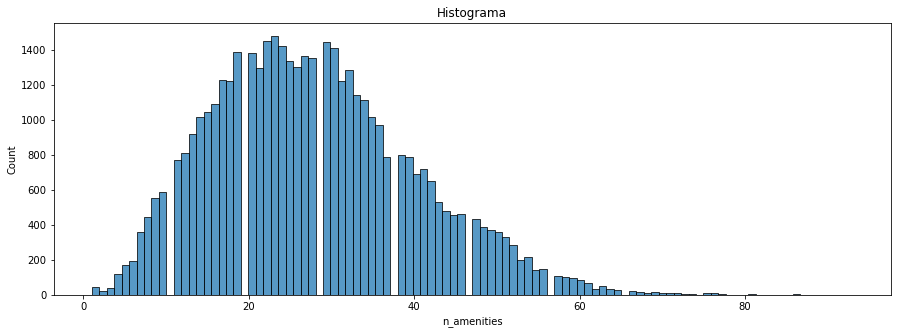

In [118]:
print(limites(base_airbnb_trat['n_amenities']))
diagrama_caixa(base_airbnb_trat['n_amenities'])
histograma(base_airbnb_trat['n_amenities'])
lim_inf, lim_sup = limites(base_airbnb_trat['n_amenities'])
qtd_outliers=base_airbnb_trat.loc[(base_airbnb_trat['n_amenities'] < lim_inf) | (base_airbnb_trat['n_amenities'] > lim_sup), :].shape[0]
prop_outliers=qtd_outliers/base_airbnb_trat.shape[0]
print('A quantidade de outliers é {}, ou seja {:.2%} dos dados'.format(qtd_outliers, prop_outliers))